In [1]:
##six lines of cohorts
##for each cohort I want to see the regret over time

In [4]:
import pickle
import pandas as pd
import os
import sys
sys.path
from scipy import stats
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
cohorts = {0: [0, 1, 2, 3, 4],
 1: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 2: [15, 16, 17, 18, 19],
 3: [20, 21, 22, 23],
 4: [24, 25, 26, 27],
 5: [28, 29, 30, 31]}

In [5]:
def get_results_new_save_person(results_path,pop_size,update_time,case,phrase,ophrase):
    
    
    files = os.listdir('{}{}'.format(results_path,case))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and ophrase not in f and 'update_days_{}'.format(update_time) in f  and '2015' not in f    ]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    to_return = {}
    to_returno = {}
    for ff in files:
        sim = int(ff.split('sim_')[1].split('_')[0])
        
        #try:
        with open('{}{}/{}'.format(results_path,case,ff),'rb') as f:
            d = pickle.load(f)
     
            #print(d.keys())
            if len(d)>0:
                to_return[sim]=d['pregret']
                to_returno[sim]=d['poregret']
    to_save = {}
    to_saveo = {}
    for sim in range(50):
        for person in range(32):
            for time,regret in to_return[sim][person].items():
                if time not in to_save:
                    to_save[time]={}
                if time not in to_saveo:
                    to_saveo[time]={}
                if person not in to_save[time]:
                    to_save[time][person]={}
                if person not in to_saveo[time]:
                    to_saveo[time][person]={}
                to_save[time][person][sim]=regret
                to_saveo[time][person][sim]=to_returno[sim][person][time]
    return {'r':to_save,'or':to_saveo}


In [158]:
tt= get_results_new_save_person('../../Downloads/pooling_results_testing/batch/','32',7,'case_three','burden818twotimesaveshortmajoritymellow','inc')


In [9]:
with open('../distributions_rl4rl/time_to_active_participants_pop_32_short_staggered_12.pkl','rb') as f:
    t = pickle.load(f)

In [114]:
def get_cohort_times(td):
    time_to_cohort_ids={}
    seen_user_ids = set([0, 1, 2, 3, 4])
    cohort_id = 0 
    for time,ids in td.items():
        if len(ids)>len(seen_user_ids):
            seen_user_ids.update(ids)
            cohort_id = cohort_id+1
       
        time_to_cohort_ids [time]=cohort_id
    print(seen_user_ids)
    
    cohort_to_times = {}
    for time,ids in td.items():
        for c,cset in cohorts.items():
            #print(set(cset))
            #print(set(set(ids)))
            if len(set(cset).intersection(set(ids)))>0:
                if c not in cohort_to_times:
                    cohort_to_times[c]=[]
                cohort_to_times[c].append(time)
    
    
    return time_to_cohort_ids,cohort_to_times

In [115]:
ctimes,tr = get_cohort_times(t)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [62]:
def get_regret_by_times(time_series,rdict):
    to_return =[]
    for time in time_series:
        if pd.Timestamp(time) in rdict:
            temp = [np.array(list(v.values())).mean() for k,v in rdict[pd.Timestamp(time)].items() ]
            to_return.append(np.array(temp).mean())
    return to_return

In [117]:
tr.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [149]:
def get_weekly_averages(points):
    to_return = []
    sems = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
        #print(temp)
        sems.append(stats.sem(temp))
    return to_return,sems

In [125]:
cone = get_weekly_averages(get_regret_by_times(tr[0],tt['or']))
ctwo = get_weekly_averages(get_regret_by_times(tr[1],tt['or']))
cthree = get_weekly_averages(get_regret_by_times(tr[5],tt['or']))

0.06137123639280825
0.12458208270878726


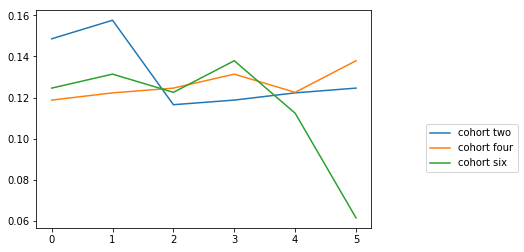

In [159]:
cone = get_weekly_averages(get_regret_by_times(tr[0],tt['or']))
ctwo = get_weekly_averages(get_regret_by_times(tr[3],tt['or']))
cthree = get_weekly_averages(get_regret_by_times(tr[5],tt['or']))
plt.plot(cone[0],label = 'cohort two')
plt.plot(ctwo[0],label = 'cohort four')
plt.plot(cthree[0],label = 'cohort six')
plt.legend(bbox_to_anchor=(1.15, .5))
print(cthree[0][-1])
print(cone[0][-1])

In [127]:
with open('../../Downloads/regret_burden818twoshortmajmellongf.pkl','rb') as f:
    pt = pickle.load(f)

0.07231379480685465
0.11880158867000014


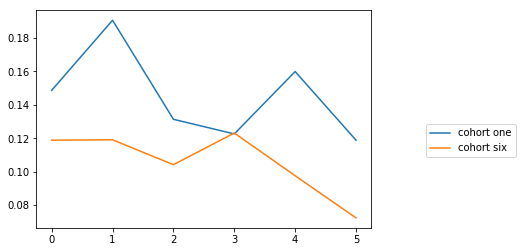

In [155]:
cone = get_weekly_averages(get_regret_by_times(tr[0],pt['case_three']['or']))
#ctwo = get_weekly_averages(get_regret_by_times(tr[3],pt['case_three']['or']))
cthree = get_weekly_averages(get_regret_by_times(tr[5],pt['case_three']['or']))
plt.plot(cone[0],label = 'cohort one')
#plt.plot(ctwo[0],label = 'cohort four')
plt.plot(cthree[0],label = 'cohort six')
plt.legend(bbox_to_anchor=(1.15, .5))
print(cthree[0][-1])
print(cone[0][-1])

In [153]:
cthree[0][-1]

0.07231379480685465